**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2020</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 03, 2021 23:59 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "ilaydabeyreli@gmail.com" or "ilayda.beyreli@bilkent.edu.tr".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "pacakge_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) What is one reason not to use the same data for both your training set and your testing set?<br>

  >b) Why is it important for machine learning algorithms to have access to high-quality(large and accurate enough) data ?<br>

  >c) What is the main motivation for using activation functions in artificial neural networks (ANNs)?<br>

  >d) The activations for class A, B and C before softmax were 12, 7 and 4. What would be the softmax values for class A and class B?<br>

  >e) What does it mean to underfit your data model?<br>

  >f) Consider you have a 14 class classification problem. What would be the probability of random guess?<br>




Answers to Question 1

a) We don't want to use the same data for both training and testing because we want to be unbiased when we make classification by testing the model with a data that has not been encountered in training.

b) In order to train the model well enough large and accurate enough of data is necessary becuase if there are small amount of data then model can be overtrained and if there not accurate data in training, model cannot perform well in testing when it comes across to accurate data.

c)The main motivation is making the output not a linear combination of the input.

d) After the softmax, value of A would be 9.92976272 ~= 10 and value of B would be 6.69062149 ~= 7.

e) It means that the model does not learn the patterns well enough to understand and process them.

f) Probability of random guess would be 1/14 ~= 0.071 for 14 class classification problem.

##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify cats according to their breeds by using simple machine learning algorithms developed for CV problems on cat images.

Your dataset consist of XXX cat images from 15 breeds. Images of each breed is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 1900 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/.....
<br>

Libraries that are required in this question is given in the following code cell.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Open the dataset zip
!unzip -q "/content/drive/MyDrive/Colab Notebooks/data.zip"

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import os
import random
import math

Mounted at /content/drive


### Data Loader [8 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "CatsDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of CatsDataset, should be retrieved using the "get_dataset" function. Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to resize the image to 64x64x3 to have consistent input size for all images. Then, you should convert your image to grayscale and flatten it into a vector. Note that the pixel values also needs to be normalized to [0,1] range.
<br>
2. To be compatible with CNN, you need to resize the image to 64x64x3 to have consistent input size for all images. Note that, you **should not** flatten the image or convert it to grayscale in this mode, i.e. all channels of the images should be included and each image should be stored as a matrix.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [2]:
class CatsDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    #def __init__(self, **kwargs): # you are free to change parameters
    def __init__(self,  imgs_list, class_to_int, mode):
        super().__init__()
        self.imgs_list = imgs_list
        self.class_to_int = class_to_int
        self.mode = mode
        
        
    '''This function should return sample count in the dataset'''
    def __len__(self):
       return len(self.imgs_list)

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        image_path = self.imgs_list[index]
        image = Image.open(image_path)
        
        if self.mode == 1:  # MLP
            # image = ImageOps.grayscale(image)  
            image = image.resize((64,64))
            image = np.array(image.convert("L")).flatten()
            image = image.astype('float32')
            image /= 255.0 # Normalize image
            
        if self.mode == 2:  # CNN
            image = image.resize((64,64))
            image = np.array(image)
            image = image.astype('float32')

        #Retriving class label
        label = image_path.split("/")[-2]
        label = self.class_to_int[label]

        return image, label

In [3]:
def get_dataset(root, mode):
    # TODO: 
    # Read dataset files
    classes = os.listdir(root)

    imgs = []
    for _class in classes:
        for img in os.listdir(root + "/" + _class):
            imgs.append(root + "/" + _class + "/" + img)
    class_to_int = {classes[i] : i for i in range(len(classes))}
    
    
    # Shuffle imgs and divide it to train, test and validation
    random.shuffle(imgs)
    training = imgs[:math.floor(len(imgs) * 0.7)]
    testing = imgs[math.floor(len(imgs) * 0.7):math.floor(len(imgs) * 0.9)]
    validating = imgs[math.floor(len(imgs) * 0.9):]

    # Create datasets
    train_dataset = CatsDataset(training, class_to_int, mode)
    test_dataset = CatsDataset(testing, class_to_int, mode)
    val_dataset = CatsDataset(validating, class_to_int, mode)

    return train_dataset, test_dataset, val_dataset

###Model Implementations [10 pts.]

#### Multi Layer Perceptron [5 pts.]
Now, implement your three layer neural network. (Input+hidden1+hidden2) FNet class will represent your neural network. The first hidden layer will contain 2048 neurons, and the second will have 1024 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [4]:
class FNet(nn.Module):
    '''Define your neural network'''
    # def __init__(self, **kwargs):
    def __init__(self):
        super(FNet, self).__init__()
        self.fc1 = nn.Linear(64*64, 2048) # Input is 64*64 flattened image
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 13)

    def forward(self, X): 
        X = X.view(-1,64*64)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

#### Convolutional Neural Network [5 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 4 layers of convolution: 
<ul>
    <li>(1) 8 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 16 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 32 filters with size of 5 x 5 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
    <li>(9) 32 filters with size of 5 x 5 with stride 1 and padding 1, (10) ReLU and (11) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [5]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self):
        super(ConvNet, self).__init__()
        self.convnet = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=1),
            nn.ReLU(),
            nn.Conv2d(8, 16, 3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Conv2d(16, 32, 5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Conv2d(32, 32, 5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
        )
        self.linear = nn.Linear(1152, 13) # There are 13 classes so output=13
     
    def forward(self, X): # you can add any additional parameters you want
        insize = X.size(0)
        X = self.convnet(X)
        X = X.view(insize, -1)
        X = self.linear(X)
        return F.log_softmax(X) 

###Stochastic Gradient Descent [35 pts.]

####Training with SGD [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. Use SGD as your optimizer. Tune your learning rate, weight decay. Take momentum as $0$ Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_sgd.pth" and "best_cnn_sgd.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

--> In order to decide on the best model, I compared validation losses, saved the model with least validation loss in all parts of this assignment. Because in validation, we evaluate the model and therefore choosing a metric from evaluation part better compared to choosing a metric from training section. I choosed loss instead of accuracy because in some epochs, loss changes but accuracy is still the same. If I choosed accuracy, probably I couldn't save the best model.

Epoch 1/50, Loss: 2.566, Acc: 7.143, Val. Loss: 2.559, Val. Acc: 9.524
Epoch 2/50, Loss: 2.559, Acc: 21.429, Val. Loss: 2.559, Val. Acc: 9.524
Epoch 3/50, Loss: 2.580, Acc: 7.143, Val. Loss: 2.559, Val. Acc: 9.524
Epoch 4/50, Loss: 2.565, Acc: 7.143, Val. Loss: 2.559, Val. Acc: 9.524
Epoch 5/50, Loss: 2.561, Acc: 7.143, Val. Loss: 2.559, Val. Acc: 9.524
Epoch 6/50, Loss: 2.559, Acc: 14.286, Val. Loss: 2.559, Val. Acc: 9.524
Epoch 7/50, Loss: 2.577, Acc: 7.143, Val. Loss: 2.558, Val. Acc: 9.524
Epoch 8/50, Loss: 2.554, Acc: 7.143, Val. Loss: 2.558, Val. Acc: 14.286
Epoch 9/50, Loss: 2.557, Acc: 21.429, Val. Loss: 2.558, Val. Acc: 14.286
Epoch 10/50, Loss: 2.559, Acc: 21.429, Val. Loss: 2.557, Val. Acc: 19.048
Epoch 11/50, Loss: 2.577, Acc: 14.286, Val. Loss: 2.557, Val. Acc: 14.286
Epoch 12/50, Loss: 2.563, Acc: 14.286, Val. Loss: 2.557, Val. Acc: 14.286
Epoch 13/50, Loss: 2.537, Acc: 42.857, Val. Loss: 2.556, Val. Acc: 14.286
Epoch 14/50, Loss: 2.550, Acc: 21.429, Val. Loss: 2.556, Val

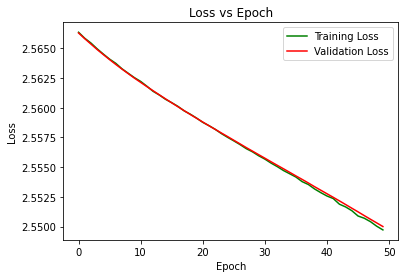

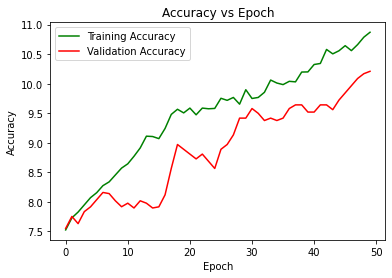

In [6]:
# Pick your hyper parameters
max_epoch = 50
train_batch = 64
val_batch = 32
test_batch = 1
learning_rate = 0.0001

# use_gpu = torch.cuda.is_available()

# Get datasets
train_dataset, test_dataset, val_dataset = get_dataset("/content/data", 1)
# Create train dataset loader
train_dataset_loader = DataLoader(
    dataset = train_dataset,
    batch_size = train_batch,
    shuffle=True,
    num_workers = 4,
)
# Create validation dataset loader
val_dataset_loader = DataLoader(
    dataset = val_dataset,
    batch_size = val_batch,
    num_workers = 4,
)
# Create test dataset loader
test_dataset_loader_mlp = DataLoader(
    dataset = test_dataset,
    batch_size = test_batch,
    num_workers = 4,
)
# initialize your network
model = FNet() 

# define your loss function
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, weight_decay=5e-04) # you can play with  weight_decay as well

train_loss = []
train_accuracy = []

val_loss = []
val_accuracy = []

min_loss = 100
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
for epoch in range(max_epoch):

    train_epoch_loss = []
    train_epoch_accuracy = []
    
    val_epoch_loss = []
    val_epoch_accuracy = []

    model=model.train()
    for image, label in train_dataset_loader:
        optimizer.zero_grad()
        # Forward
        preds = model(image)

        # Accuracy
        probs = torch.softmax(preds, dim=1)
        winners = probs.argmax(dim=1)
        corrects = (winners == label)
        accuracy = corrects.sum().float() / float( label.size(0) )
        acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0) )

        # Loss
        #Calculate Loss & Backward, Update Weights (Step)
        loss = criterion(preds, label)
        loss.backward()
        optimizer.step()

        #Append loss & acc
        loss_value = loss.item()
        train_epoch_loss.append(loss_value)
        train_epoch_accuracy.append(acc)

    
    correct = 0
    model = model.eval()
    for image, label in val_dataset_loader:
        with torch.no_grad():
            # Forward
            preds = model(image)

            # Accuracy
            # true = label
            # pred = F.softmax(preds, dim = 1)
            # true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
            # acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
            # acc = float((100 * acc.sum()) / len(acc))
            # acc = round(acc, 4)

            probs = torch.softmax(preds, dim=1)
            winners = probs.argmax(dim=1)
            corrects = (winners == label)
            accuracy = corrects.sum().float() / float( label.size(0) )
            acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0))

            # Loss
            loss = criterion(preds, label)
            #Append loss & acc
            loss_value = loss.item()
            val_epoch_loss.append(loss_value)
            val_epoch_accuracy.append(acc)

            if loss_value < min_loss:
                min_loss = loss_value
                torch.save(model, "/content/drive/MyDrive/Colab Notebooks/best_mlp_sgd.pth")

    print("Epoch {}/{}, Loss: {:.3f}, Acc: {:.3f}, Val. Loss: {:.3f}, Val. Acc: {:.3f}".format(
        epoch+1,max_epoch, 
        train_epoch_loss[-1], 
        train_epoch_accuracy[-1],
        val_epoch_loss[-1],
        val_epoch_accuracy[-1]))


    train_epoch_loss = np.mean(train_epoch_loss)
    train_epoch_accuracy = np.mean(train_epoch_accuracy)
    
    val_epoch_loss = np.mean(val_epoch_loss)
    val_epoch_accuracy = np.mean(val_epoch_accuracy)
    
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)


# plot losses vs epoch 
epochs = range(0, max_epoch)
plt.plot(epochs, train_loss, 'g', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(epochs, train_accuracy, 'g', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1/50, Loss: 2.669, Acc: 7.143, Val. Loss: 2.794, Val. Acc: 0.000
Epoch 2/50, Loss: 2.630, Acc: 14.286, Val. Loss: 2.655, Val. Acc: 4.762
Epoch 3/50, Loss: 2.576, Acc: 14.286, Val. Loss: 2.635, Val. Acc: 0.000
Epoch 4/50, Loss: 2.557, Acc: 14.286, Val. Loss: 2.600, Val. Acc: 4.762
Epoch 5/50, Loss: 2.590, Acc: 14.286, Val. Loss: 2.575, Val. Acc: 4.762
Epoch 6/50, Loss: 2.477, Acc: 21.429, Val. Loss: 2.540, Val. Acc: 4.762
Epoch 7/50, Loss: 2.577, Acc: 21.429, Val. Loss: 2.530, Val. Acc: 9.524
Epoch 8/50, Loss: 2.449, Acc: 28.571, Val. Loss: 2.501, Val. Acc: 19.048
Epoch 9/50, Loss: 2.379, Acc: 28.571, Val. Loss: 2.449, Val. Acc: 19.048
Epoch 10/50, Loss: 2.348, Acc: 21.429, Val. Loss: 2.451, Val. Acc: 9.524
Epoch 11/50, Loss: 2.468, Acc: 7.143, Val. Loss: 2.434, Val. Acc: 9.524
Epoch 12/50, Loss: 2.674, Acc: 0.000, Val. Loss: 2.442, Val. Acc: 9.524
Epoch 13/50, Loss: 2.574, Acc: 14.286, Val. Loss: 2.408, Val. Acc: 9.524
Epoch 14/50, Loss: 2.292, Acc: 21.429, Val. Loss: 2.405, Val.

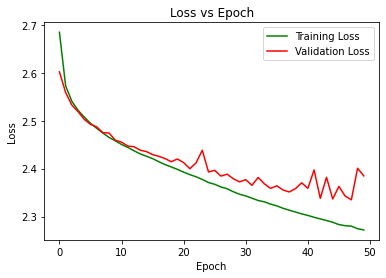

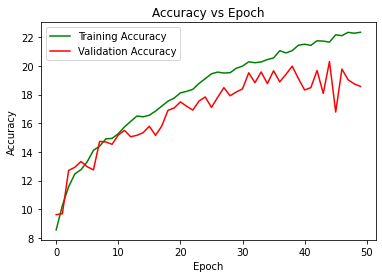

In [7]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 50
train_batch = 64
val_batch = 32
test_batch = 1
learning_rate = 0.0001

#use_gpu = torch.cuda.is_available()

# Get datasets
train_dataset, test_dataset, val_dataset = get_dataset("/content/data", 2)
# Create train dataset loader
train_dataset_loader = DataLoader(
    dataset = train_dataset,
    batch_size = train_batch,
    shuffle=True,
    num_workers = 4,
)
# Create validation dataset loader
val_dataset_loader = DataLoader(
    dataset = val_dataset,
    batch_size = val_batch,
    num_workers = 4,
)
# Create test dataset loader
test_dataset_loader_cnn = DataLoader(
    dataset = test_dataset,
    batch_size = test_batch,
    num_workers = 4,
)
# initialize your network
model = ConvNet()

# define your loss function
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0, weight_decay=5e-04) # you can play with  weight_decay as well
    
train_loss = []
train_accuracy = []

val_loss = []
val_accuracy = []

min_loss = 100
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
for epoch in range(max_epoch):

    train_epoch_loss = []
    train_epoch_accuracy = []
    
    val_epoch_loss = []
    val_epoch_accuracy = []

    model=model.train()
    for image, label in train_dataset_loader:

        
        optimizer.zero_grad()
        # Forward
        preds = model(image.permute(0,3,1,2))

        # Accuracy
        probs = torch.softmax(preds, dim=1)
        winners = probs.argmax(dim=1)
        corrects = (winners == label)
        accuracy = corrects.sum().float() / float( label.size(0) )
        acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0))
        # Loss
        #Calculate Loss & Backward, Update Weights (Step)
        loss = criterion(preds, label)
        loss.backward()
        optimizer.step()

        #Append loss & acc
        loss_value = loss.item()
        train_epoch_loss.append(loss_value)
        train_epoch_accuracy.append(acc)

    
    
    model = model.eval()
    for image, label in val_dataset_loader:
        with torch.no_grad():
            # Forward
            preds = model(image.permute(0,3,1,2))

            # Accuracy
            probs = torch.softmax(preds, dim=1)
            winners = probs.argmax(dim=1)
            corrects = (winners == label)
            accuracy = corrects.sum().float() / float( label.size(0) )
            acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0))

            # Loss
            loss = criterion(preds, label)
            #Append loss & acc
            loss_value = loss.item()
            val_epoch_loss.append(loss_value)
            val_epoch_accuracy.append(acc)

            if loss_value < min_loss:
                min_loss = loss_value
                torch.save(model, "/content/drive/MyDrive/Colab Notebooks/best_cnn_sgd.pth")

    print("Epoch {}/{}, Loss: {:.3f}, Acc: {:.3f}, Val. Loss: {:.3f}, Val. Acc: {:.3f}".format(
        epoch+1,max_epoch, 
        train_epoch_loss[-1], 
        train_epoch_accuracy[-1],
        val_epoch_loss[-1],
        val_epoch_accuracy[-1]))


    train_epoch_loss = np.mean(train_epoch_loss)
    train_epoch_accuracy = np.mean(train_epoch_accuracy)
    
    val_epoch_loss = np.mean(val_epoch_loss)
    val_epoch_accuracy = np.mean(val_epoch_accuracy)
    
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)


# plot losses vs epoch 
epochs = range(0, max_epoch)
plt.plot(epochs, train_loss, 'g', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(epochs, train_accuracy, 'g', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


####Test with SGD [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **models**. Which one is more preferable? Why?

--> According to the accuracy and loss plots, CNN with SGD model is better compared to MLP with SGD model because when they are trained with same epoch size and hyperparameters, it can be seen that CNN model gives better accuracy and lower loss value therefore it is more preferable. 

In the test part however, MLP has better metric outcomes except loss. But generally models are compared based on the losses and in can be again decided that CNN gives better results. 

Another reason for choosing CNN is that it uses information sharing between layers. But CNN has a downside which is its algorithm complexity. In CNN we deal with images with 3 channels that are not flattened. Therefore it works slowly. 

Mean Loss: 2.530548572540283 
Mean Acc: 0.07748776508972267 
Mean Macro Precision: 0.0815056144377286 
Mean Macro Recall: 0.07406144017619525 
Mean Macro F1 Score: 0.05106838391767708


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


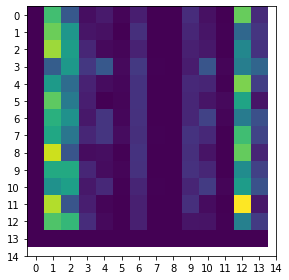

In [8]:
# Test MLP
# load best model
best_path = "/content/drive/MyDrive/Colab Notebooks/best_mlp_sgd.pth"
model = torch.load(best_path)

# define your loss function
criterion = nn.CrossEntropyLoss()

predss = []
labels = []
# evaluate on test set
model = model.eval()
with torch.no_grad():
    for image, label in test_dataset_loader_mlp:
        # Forward
        out = model(image)
        # Loss
        loss = criterion(out, label)
        losses = loss.item()

        # Metrics
        probs = torch.softmax(out, dim=1)

        label = label.detach().numpy()[0]
        preds = probs.detach().numpy()[0]

        labels.append(label)
        predss.append((np.where(preds == np.max(preds))[0] + 1)[0])

    acc = accuracy_score(labels, predss)
    conf_matrix = confusion_matrix(labels, predss)
    pre = precision_score(labels, predss, average='macro')
    recall = recall_score(labels, predss, average='macro')
    f1 = f1_score(labels, predss, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Mean Loss: 1.4236265420913696 
Mean Acc: 0.058523654159869494 
Mean Macro Precision: 0.05885539765385217 
Mean Macro Recall: 0.054779618178457494 
Mean Macro F1 Score: 0.053909502170537096


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


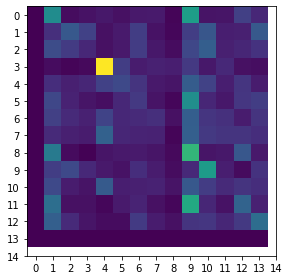

In [9]:
# Test CNN
# load best model
best_path = "/content/drive/MyDrive/Colab Notebooks/best_cnn_sgd.pth"
model = torch.load(best_path)

# define your loss function
criterion = nn.CrossEntropyLoss()

predss = []
labels = []
# evaluate on test set
model = model.eval()
with torch.no_grad():
    for image, label in test_dataset_loader_cnn:
        # Forward
        out = model(image.permute(0,3,1,2))
        # Loss
        loss = criterion(out, label)
        losses = loss.item()

        # Metrics
        probs = torch.softmax(out, dim=1)

        label = label.detach().numpy()[0]
        preds = probs.detach().numpy()[0]

        labels.append(label)
        predss.append((np.where(preds == np.max(preds))[0] + 1)[0])

    acc = accuracy_score(labels, predss)
    conf_matrix = confusion_matrix(labels, predss)
    pre = precision_score(labels, predss, average='macro')
    recall = recall_score(labels, predss, average='macro')
    f1 = f1_score(labels, predss, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

###Adam Optimizer [35 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_adam.pth" and "best_cnn_adam.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

--> As explanied before with reasons, I choosed validation loss metric to decide on the best model.

Epoch 1/10, Loss: 2.624, Acc: 7.143, Val. Loss: 2.438, Val. Acc: 14.286
Epoch 2/10, Loss: 2.539, Acc: 7.143, Val. Loss: 2.437, Val. Acc: 9.524
Epoch 3/10, Loss: 2.657, Acc: 14.286, Val. Loss: 2.378, Val. Acc: 28.571
Epoch 4/10, Loss: 2.498, Acc: 21.429, Val. Loss: 2.437, Val. Acc: 14.286
Epoch 5/10, Loss: 2.196, Acc: 28.571, Val. Loss: 2.494, Val. Acc: 4.762
Epoch 6/10, Loss: 2.531, Acc: 14.286, Val. Loss: 2.441, Val. Acc: 9.524
Epoch 7/10, Loss: 2.441, Acc: 14.286, Val. Loss: 2.378, Val. Acc: 19.048
Epoch 8/10, Loss: 2.507, Acc: 14.286, Val. Loss: 2.431, Val. Acc: 9.524
Epoch 9/10, Loss: 2.075, Acc: 14.286, Val. Loss: 2.376, Val. Acc: 9.524
Epoch 10/10, Loss: 2.328, Acc: 35.714, Val. Loss: 2.371, Val. Acc: 9.524


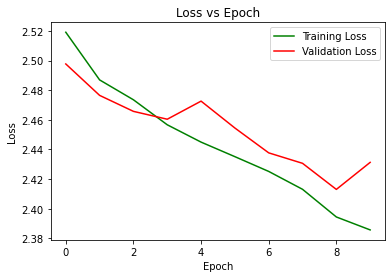

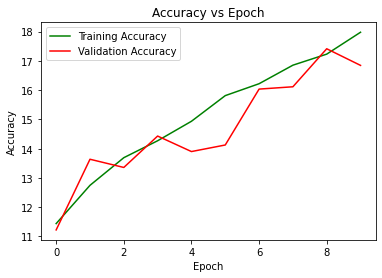

In [11]:
# Pick your hyper parameters
max_epoch = 10
train_batch = 64
val_batch = 32
test_batch = 1
learning_rate = 0.0001

#use_gpu = torch.cuda.is_available()

# Get datasets
train_dataset, test_dataset, val_dataset = get_dataset("/content/data", 1)
# Create train dataset loader
train_dataset_loader = DataLoader(
    dataset = train_dataset,
    batch_size = train_batch,
    shuffle=True,
    num_workers = 4,
)
# Create validation dataset loader
val_dataset_loader = DataLoader(
    dataset = val_dataset,
    batch_size = val_batch,
    num_workers = 4,
)
# Create test dataset loader
test_dataset_loader_mlp = DataLoader(
    dataset = test_dataset,
    batch_size = test_batch,
    num_workers = 4,
)
# initialize your network
model = FNet() 

# define your loss function
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well

train_loss = []
train_accuracy = []

val_loss = []
val_accuracy = []

min_loss = 100
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
for epoch in range(max_epoch):

    train_epoch_loss = []
    train_epoch_accuracy = []
    
    val_epoch_loss = []
    val_epoch_accuracy = []

    model=model.train()
    for image, label in train_dataset_loader:
        optimizer.zero_grad()
        # Forward
        preds = model(image)

        # Accuracy
        probs = torch.softmax(preds, dim=1)
        winners = probs.argmax(dim=1)
        corrects = (winners == label)
        accuracy = corrects.sum().float() / float( label.size(0) )
        acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0))

        # Loss
        #Calculate Loss & Backward, Update Weights (Step)
        loss = criterion(preds, label)
        loss.backward()
        optimizer.step()

        #Append loss & acc
        loss_value = loss.item()
        train_epoch_loss.append(loss_value)
        train_epoch_accuracy.append(acc)

    
    
    model = model.eval()
    for image, label in val_dataset_loader:
        with torch.no_grad():
            # Forward
            preds = model(image)

            # Accuracy
            probs = torch.softmax(preds, dim=1)
            winners = probs.argmax(dim=1)
            corrects = (winners == label)
            accuracy = corrects.sum().float() / float( label.size(0) )
            acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0))

            # Loss
            loss = criterion(preds, label)
            #Append loss & acc
            loss_value = loss.item()
            val_epoch_loss.append(loss_value)
            val_epoch_accuracy.append(acc)

            if loss_value < min_loss:
                min_loss = loss_value
                torch.save(model, "/content/drive/MyDrive/Colab Notebooks/best_mlp_adam.pth")

    print("Epoch {}/{}, Loss: {:.3f}, Acc: {:.3f}, Val. Loss: {:.3f}, Val. Acc: {:.3f}".format(
        epoch+1,max_epoch, 
        train_epoch_loss[-1], 
        train_epoch_accuracy[-1],
        val_epoch_loss[-1],
        val_epoch_accuracy[-1]))


    train_epoch_loss = np.mean(train_epoch_loss)
    train_epoch_accuracy = np.mean(train_epoch_accuracy)
    
    val_epoch_loss = np.mean(val_epoch_loss)
    val_epoch_accuracy = np.mean(val_epoch_accuracy)
    
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)


# plot losses vs epoch 
epochs = range(0, max_epoch)
plt.plot(epochs, train_loss, 'g', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(epochs, train_accuracy, 'g', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 1/10, Loss: 2.169, Acc: 35.714, Val. Loss: 2.202, Val. Acc: 28.571
Epoch 2/10, Loss: 2.142, Acc: 35.714, Val. Loss: 1.985, Val. Acc: 19.048
Epoch 3/10, Loss: 2.119, Acc: 21.429, Val. Loss: 1.939, Val. Acc: 33.333
Epoch 4/10, Loss: 2.088, Acc: 21.429, Val. Loss: 1.872, Val. Acc: 38.095
Epoch 5/10, Loss: 2.135, Acc: 42.857, Val. Loss: 1.880, Val. Acc: 47.619
Epoch 6/10, Loss: 2.020, Acc: 35.714, Val. Loss: 1.759, Val. Acc: 42.857
Epoch 7/10, Loss: 2.433, Acc: 28.571, Val. Loss: 1.818, Val. Acc: 38.095
Epoch 8/10, Loss: 2.024, Acc: 28.571, Val. Loss: 1.801, Val. Acc: 42.857
Epoch 9/10, Loss: 1.495, Acc: 50.000, Val. Loss: 1.700, Val. Acc: 57.143
Epoch 10/10, Loss: 2.071, Acc: 28.571, Val. Loss: 1.877, Val. Acc: 38.095


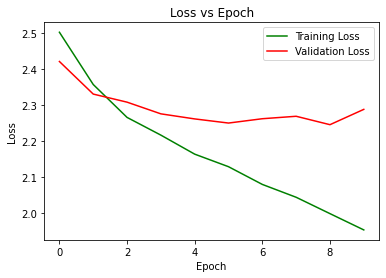

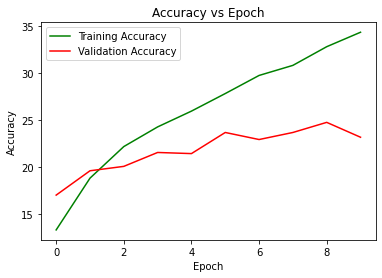

In [12]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 10
train_batch = 64
val_batch = 32
test_batch = 1
learning_rate = 0.0001

#use_gpu = torch.cuda.is_available()

# Get datasets
train_dataset, test_dataset, val_dataset = get_dataset("/content/data", 2)
# Create train dataset loader
train_dataset_loader = DataLoader(
    dataset = train_dataset,
    batch_size = train_batch,
    shuffle=True,
    num_workers = 4,
)
# Create validation dataset loader
val_dataset_loader = DataLoader(
    dataset = val_dataset,
    batch_size = val_batch,
    num_workers = 4,
)
# Create test dataset loader
test_dataset_loader_cnn = DataLoader(
    dataset = test_dataset,
    batch_size = test_batch,
    num_workers = 4,
)
# initialize your network
model = ConvNet()

# define your loss function
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
train_loss = []
train_accuracy = []

val_loss = []
val_accuracy = []

min_loss = 100
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
    
for epoch in range(max_epoch):

    train_epoch_loss = []
    train_epoch_accuracy = []
    
    val_epoch_loss = []
    val_epoch_accuracy = []

    model=model.train()
    for image, label in train_dataset_loader:

        
        optimizer.zero_grad()
        # Forward
        preds = model(image.permute(0,3,1,2))

        # Accuracy
        probs = torch.softmax(preds, dim=1)
        winners = probs.argmax(dim=1)
        corrects = (winners == label)
        accuracy = corrects.sum().float() / float( label.size(0) )
        acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0))

        # Loss
        #Calculate Loss & Backward, Update Weights (Step)
        loss = criterion(preds, label)
        loss.backward()
        optimizer.step()

        #Append loss & acc
        loss_value = loss.item()
        train_epoch_loss.append(loss_value)
        train_epoch_accuracy.append(acc)

    model = model.eval()
    for image, label in val_dataset_loader:
        with torch.no_grad():
            # Forward
            preds = model(image.permute(0,3,1,2))

            # Accuracy
            probs = torch.softmax(preds, dim=1)
            winners = probs.argmax(dim=1)
            corrects = (winners == label)
            accuracy = corrects.sum().float() / float( label.size(0) )
            acc = (torch.softmax(preds, dim=1).argmax(dim=1) == label).sum().float() * 100 / float( label.size(0))

            # Loss
            loss = criterion(preds, label)
            #Append loss & acc
            loss_value = loss.item()
            val_epoch_loss.append(loss_value)
            val_epoch_accuracy.append(acc)

            if loss_value < min_loss:
                min_loss = loss_value
                torch.save(model, "/content/drive/MyDrive/Colab Notebooks/best_cnn_adam.pth")

    print("Epoch {}/{}, Loss: {:.3f}, Acc: {:.3f}, Val. Loss: {:.3f}, Val. Acc: {:.3f}".format(
        epoch+1,max_epoch, 
        train_epoch_loss[-1], 
        train_epoch_accuracy[-1],
        val_epoch_loss[-1],
        val_epoch_accuracy[-1]))


    train_epoch_loss = np.mean(train_epoch_loss)
    train_epoch_accuracy = np.mean(train_epoch_accuracy)
    
    val_epoch_loss = np.mean(val_epoch_loss)
    val_epoch_accuracy = np.mean(val_epoch_accuracy)
    
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)


# plot losses vs epoch 
epochs = range(0, max_epoch)
plt.plot(epochs, train_loss, 'g', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot accuracies vs epoch
plt.plot(epochs, train_accuracy, 'g', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


####Test with ADAM [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

--> It can be seen from the output figures that even though I train the models with Adam optimizer with less epochs, they give better results in terms of accuracy and loss. In that case, Adam optimizer is more preferable. One of the most important advantage of using Adam instead of SGD optimizer is that Adam optimizer computes individual adaptive learning rates for different parameters. And also it is better on overall CNN models. 

Some downsides of Adam optimizer are that according to experiments, Adam optimizer should be faster than SGD but in my case, SGD was faster and Adam optimizer is accused of having convergence problems. 

As a result, I would choose Adam optimizer instead of SGD because it gives better accuracy and loss values in shorter train epochs even though each epoch takes longer time compared to epochs of SGD based training. 

Mean Loss: 2.3789865970611572 
Mean Acc: 0.06708809135399674 
Mean Macro Precision: 0.058287749529367286 
Mean Macro Recall: 0.06366471434815459 
Mean Macro F1 Score: 0.054640649976958576


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


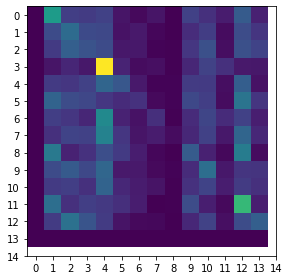

In [13]:
# Test MLP
# load best model
best_path = "/content/drive/MyDrive/Colab Notebooks/best_mlp_adam.pth"
model = torch.load(best_path)

# define your loss function
criterion = nn.CrossEntropyLoss()

predss = []
labels = []
# evaluate on test set
model = model.eval()
with torch.no_grad():
    for image, label in test_dataset_loader_mlp:
        # Forward
        out = model(image)
        # Loss
        loss = criterion(out, label)
        losses = loss.item()

        # Metrics
        probs = torch.softmax(out, dim=1)

        label = label.detach().numpy()[0]
        preds = probs.detach().numpy()[0]

        labels.append(label)
        predss.append((np.where(preds == np.max(preds))[0] + 1)[0])

    acc = accuracy_score(labels, predss)
    conf_matrix = confusion_matrix(labels, predss)
    pre = precision_score(labels, predss, average='macro')
    recall = recall_score(labels, predss, average='macro')
    f1 = f1_score(labels, predss, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Mean Loss: 2.2978243827819824 
Mean Acc: 0.05464926590538336 
Mean Macro Precision: 0.05084039107273325 
Mean Macro Recall: 0.051565300297093976 
Mean Macro F1 Score: 0.049106964432809784


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


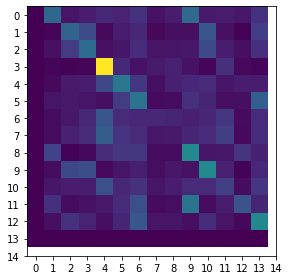

In [14]:
# Test CNN
# load best model
best_path = "/content/drive/MyDrive/Colab Notebooks/best_cnn_adam.pth"
model = torch.load(best_path)

# define your loss function
criterion = nn.CrossEntropyLoss()

predss = []
labels = []
# evaluate on test set
model = model.eval()
with torch.no_grad():
    for image, label in test_dataset_loader_cnn:
        # Forward
        out = model(image.permute(0,3,1,2))
        # Loss
        loss = criterion(out, label)
        losses = loss.item()

        # Metrics
        probs = torch.softmax(out, dim=1)

        label = label.detach().numpy()[0]
        preds = probs.detach().numpy()[0]

        labels.append(label)
        predss.append((np.where(preds == np.max(preds))[0] + 1)[0])

    acc = accuracy_score(labels, predss)
    conf_matrix = confusion_matrix(labels, predss)
    pre = precision_score(labels, predss, average='macro')
    recall = recall_score(labels, predss, average='macro')
    f1 = f1_score(labels, predss, average='macro')

# print metrics
print("Mean Loss:", losses, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()